<a href="https://colab.research.google.com/github/pragmatizt/deforestation_app/blob/master/02_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly

     |████████████████████████████████| 102kB 2.1MB/s 
     |████████████████████████████████| 133kB 11.3MB/s 
     |████████████████████████████████| 7.2MB 47.1MB/s 
     |████████████████████████████████| 614kB 26.6MB/s 
     |████████████████████████████████| 235kB 44.7MB/s 
     |████████████████████████████████| 307kB 40.2MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 215kB 37.9MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 737kB 43.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=c4eb3eda8c950512155003f75ca5355278b17d8c5697423fd8c5414344005c54
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=275eb62c741192d025b635ebc15e6d5e2be6c606bd718c45416bf9f141c6bacc
  Stored 

In [0]:
import pandas as pd
import numpy as np
import os
import csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
# import the 1990-2016 dataframe wrangled from 01_data_wrangling.ipynb (also importing 2017-2025)
# (https://github.com/pragmatizt/deforestation_app/blob/master/notebooks/01_data_wrangling.ipynb)

df1 = pd.read_csv('https://raw.githubusercontent.com/pragmatizt/deforestation_app/master/wrangled_data/merged_1990_2016.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/pragmatizt/deforestation_app/master/wrangled_data/merged_features_only_2017_2025.csv')


In [34]:
df1.head()

,Unnamed: 0,Country Name,Country Code,Year,GDP growth (annual %),Urban population,Agricultural land (% of land area),Livestock production index (2004-2006 = 100),Electric power consumption (kWh per capita),Ores and metals exports (% of merchandise exports),Forest area (% of land area)
0,0,Aruba,ABW,1990,3.96,31273.00,11.11,67.49,1237.52,1.10,2.33
1,1,Afghanistan,AFG,1990,3.14,2628554.00,58.27,70.69,1237.52,2.75,2.07
2,2,Angola,AGO,1990,-3.45,4400964.00,46.04,70.11,53.17,6.22,48.91
3,3,Albania,ALB,1990,-9.58,1197222.00,40.91,57.97,552.25,2.75,28.79
4,4,Andorra,AND,1990,3.78,51627.00,48.94,67.49,1237.52,2.75,34.04


In [33]:
df2.head()

,Unnamed: 0,Country Code,Year,Urban population,Agricultural land (% of land area),Livestock production index (2004-2006 = 100),Electric power consumption (kWh per capita),Ores and metals exports (% of merchandise exports)
0,0,ABW,2017,47793.06,11.11,122.55,1901.30,4.12
1,1,AFG,2017,8663347.15,58.04,109.57,1901.30,2.02
2,2,AGO,2017,17876481.97,47.28,142.03,190.49,2.04
3,3,ALB,2017,1657050.46,43.31,118.57,1851.69,15.30
4,4,AND,2017,76838.59,40.20,122.55,1901.30,3.62


In [7]:
df = df1.drop(columns=['Country Name', 'Unnamed: 0'])
df.head()

,Country Code,Year,GDP growth (annual %),Urban population,Agricultural land (% of land area),Livestock production index (2004-2006 = 100),Electric power consumption (kWh per capita),Ores and metals exports (% of merchandise exports),Forest area (% of land area)
0,ABW,1990,3.96,31273.00,11.11,67.49,1237.52,1.10,2.33
1,AFG,1990,3.14,2628554.00,58.27,70.69,1237.52,2.75,2.07
2,AGO,1990,-3.45,4400964.00,46.04,70.11,53.17,6.22,48.91
3,ALB,1990,-9.58,1197222.00,40.91,57.97,552.25,2.75,28.79
4,AND,1990,3.78,51627.00,48.94,67.49,1237.52,2.75,34.04


## Train/Val/Test

In [0]:
# Arrange data into X features matrix and y target vector
features = df.columns[:-1].tolist()
target = 'Forest area (% of land area)'

X = df.drop(columns=target)
y = df[target]

In [0]:
# train/val/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [10]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((4561, 8), (4561,), (1141, 8), (1141,), (1426, 8), (1426,))

## One hot encoding

In [18]:
pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9849535713127529


In [19]:
print('Accuracy with n_estimators=100:', 0.9845145542585125)
print('Accuracy with n_estimators=150:', 0.9846637054044655)
print('Accuracy with n_estimators=250:', 0.9848615189605664)
print('Accuracy with n_estimators=300:', 0.9849535713127529)  # best accuracy score
print('Accuracy with n_estimators=250:', 0.9848312974531664)  # additional training results in decline of accuracy score

Accuracy with n_estimators=100: 0.9845145542585125
Accuracy with n_estimators=150: 0.9846637054044655
Accuracy with n_estimators=250: 0.9848615189605664
Accuracy with n_estimators=300: 0.9849535713127529
Accuracy with n_estimators=250: 0.9848312974531664


## Produce heatmap to check for high correlations

Text(0.5, 1, 'Correlation Heatmap of Deforestation Features')

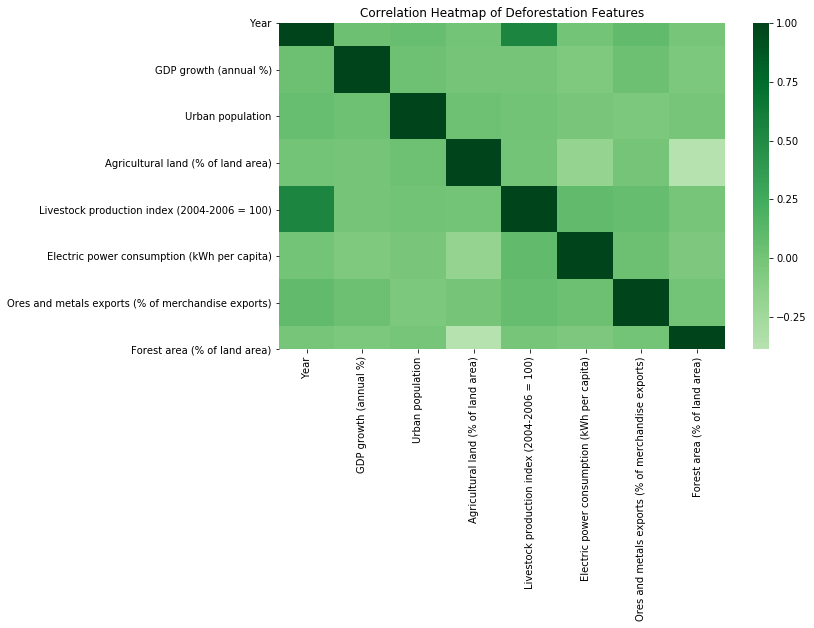

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='Greens')
ax.set_title('Correlation Heatmap of Deforestation Features')

## Test (Get predictions)
(see continuation on notebook 3, which focuses on forecasting: [link](https://github.com/pragmatizt/deforestation_app/blob/master/notebooks/03_forecasting.ipynb))

In [0]:
## See continuation on:
# https://github.com/pragmatizt/deforestation_app/blob/master/notebooks/03_forecasting.ipynb